# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.328200e+01     1.357761e+01
 * time: 0.004034996032714844
     1     6.253075e+01     9.433982e+00
 * time: 0.011753082275390625
     2     5.462413e+01     1.160377e+01
 * time: 0.029072046279907227
     3     3.992142e+01     8.058819e+00
 * time: 0.05244016647338867
     4     2.889073e+01     6.868365e+00
 * time: 0.07642102241516113
     5     2.257375e+01     5.226069e+00
 * time: 0.18300199508666992
     6     2.122342e+01     5.912549e+00
 * time: 0.20012307167053223
     7     1.101715e+01     3.189369e+00
 * time: 0.21696019172668457
     8     7.873853e+00     3.474551e+00
 * time: 0.23372697830200195
     9     6.928094e+00     2.001289e+00
 * time: 0.2505981922149658
    10     6.532167e+00     1.989135e+00
 * time: 0.2640061378479004
    11     6.232110e+00     1.197722e+00
 * time: 0.2773871421813965
    12     5.993599e+00     1.154645e+00
 * time: 0.29088902473449707
    13     5.863751e+00     1.390895e+00
 * time:

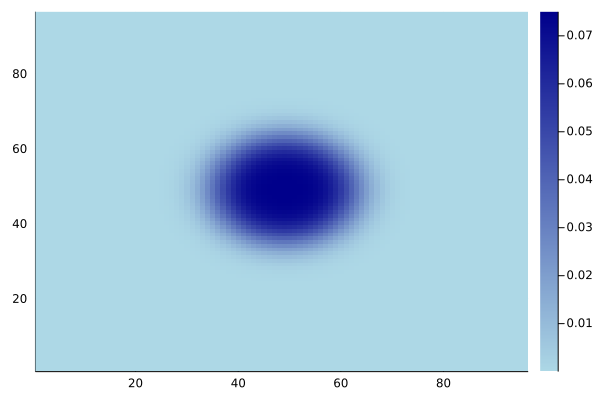

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))